# Геометрическое распределение в Python
Библиотека `scipy`

In [1]:
from scipy.stats import geom
import numpy as np

import matplotlib.pyplot as plt

Пусть $X\sim Geom(p=0.3)$

Зададим распределение с заданными параметрами

In [2]:
p = 0.3
rv = geom(p)

## Распределение вероятностей

Для вычисления вероятностей используем следующие методы

|Вероятность|Метод|
|-|-|
|$f(k)=P(X=k)$|`.pmf(k+1)`|
|$F(k)=P(X\leq k)$|`.cdf(k+1)`|
|$P(X>k)$|`.sf(k+1)=1-.cdf(k+1)`|
|$P(k_1<X\leq k_2)$|`.cdf(k2+1)-.cdf(k1+1)`|

Для для вычисления вероятности $P(k_1\leq X\leq k_2)$ можно использовать следующее наблюдение
$$
	P(k_1\leq X\leq k_2)=P(k_1-1< X\leq k_2)
$$


### Пример 1
Вычислим вероятность $P(X=2)=f(2)$



In [3]:
rv.pmf(k=2+1)

np.float64(0.14699999999999996)

Вычисли её непосредственно по формуле 

$$
	P(X=k)=(1-p)^kp
$$

In [4]:
k = 2
(1-p)**k*p

0.14699999999999996

### Пример 2
Вычислим вероятности

$$
\begin{aligned}
	&P(X\leq 2) & &P(X>1) & &P(1<X\leq 3)
\end{aligned}
$$

In [5]:
rv.cdf(2+1), rv.sf(1+1), rv.cdf(2+1)-rv.cdf(1+1)

(np.float64(0.6569999999999999),
 np.float64(0.49000000000000005),
 np.float64(0.1469999999999999))

## Математическое ожидание, дисперсия, стандартное отклонение

Для вычисления используем следующие методы

|Величина|Метод|
|-|-|
|Математическое ожидание|`.mean()-1`|
|Дисперсия|`.var()`|
|Стандартное отклонение|`.std()`|

### Пример 3

Вычислим $E(X), Var(X), \sigma(X)$


In [6]:
rv.mean()-1, rv.var(), rv.std()

(np.float64(2.3333333333333335),
 np.float64(7.777777777777779),
 np.float64(2.7888667551135855))

Можно вычислить непосредственно по формулам

$$
\begin{aligned}
	E(X)&=\frac{1-p}{p} &
	Var(X)&=\frac{1-p}{p^2} & \sigma(X)&=\sqrt{Var(X)}
\end{aligned}
$$

In [7]:
(1-p)/p, (1-p)/p**2, ((1-p)/p**2)**0.5

(2.3333333333333335, 7.777777777777778, 2.788866755113585)

## Визуализация распределения вероятностей

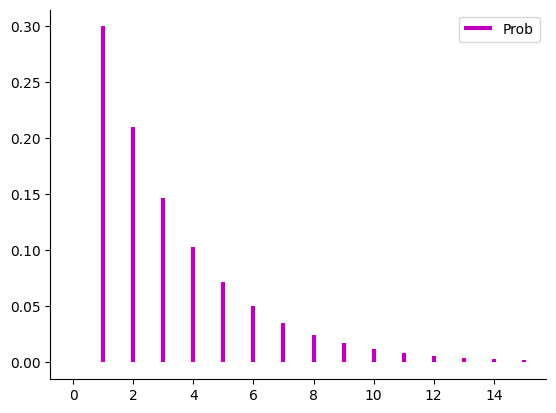

In [8]:
x_min, x_max = 0, 15

x = np.arange(start=x_min, stop=x_max+1, step=1)

fig, ax =  plt.subplots(1,1)

ax.vlines(x, 0, rv.pmf(x), linestyle='-', lw=3,  colors='m', label='Prob')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.show()

## Визуализация функции распределения

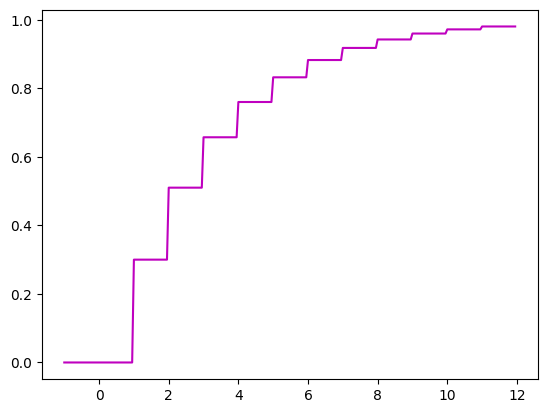

In [9]:
x_min, x_max = 0, 10
x = np.arange(start=x_min-1, stop=x_max+2, step=0.05)

plt.plot(x, rv.cdf(np.floor(x)), color='m')
plt.show()